# Visualisasi Senyawa-Protein

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#load df_merge
df = pd.read_csv('dataset/df_final.csv')
df_vis = pd.read_csv('dataset/final/kelas_data.csv')

In [6]:
PubChem_CID = df['PubChem CID']

In [7]:
df_vis['CID_senyawa'] = PubChem_CID
first_column = df_vis.pop('CID_senyawa')
df_vis.insert(0, 'CID_senyawa', first_column)
df_vis

,CID_senyawa,PPARGC1A,INS,LEP,B3GNTL1,PPARG,EP300,LPL
0,261,1,0,0,0,0,1,0
1,263,1,0,0,0,0,0,0
2,305,1,0,0,0,0,0,0
3,525,1,0,0,0,0,0,0
4,586,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
5645,17760032,0,0,0,0,0,0,1
5646,1367211,0,0,0,0,0,0,1
5647,2133789,0,0,0,0,0,0,1
5648,992586,0,0,0,0,0,0,1


In [8]:
categories = list(df_vis.columns.values)
categories = categories[1:]
print(categories)

['PPARGC1A', 'INS', 'LEP', 'B3GNTL1', 'PPARG', 'EP300', 'LPL']


In [9]:
# Calculating number of comments in each category

counts = []
for category in categories:
    counts.append((category, df_vis[category].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'CID_senyawa'])
df_stats

,category,CID_senyawa
0,PPARGC1A,186
1,INS,244
2,LEP,121
3,B3GNTL1,20
4,PPARG,4942
5,EP300,428
6,LPL,151


In [10]:
df_stats['CID_senyawa'].sum()

6092

In [11]:
categories

['PPARGC1A', 'INS', 'LEP', 'B3GNTL1', 'PPARG', 'EP300', 'LPL']

In [12]:
df_vis.iloc[:,1:].sum().values

array([ 186,  244,  121,   20, 4942,  428,  151])

/home/fadilrisdian/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


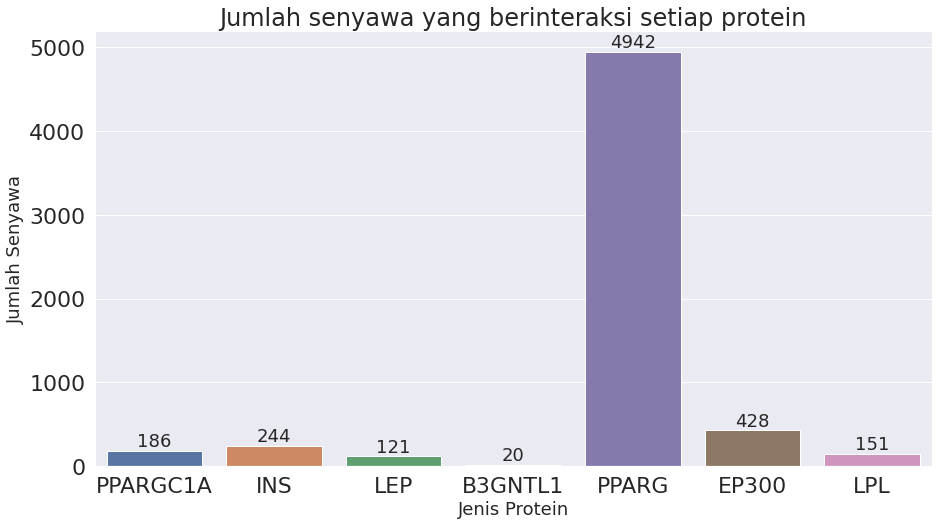

In [13]:
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax= sns.barplot(categories, df_vis.iloc[:,1:].sum().values)

plt.title("Jumlah senyawa yang berinteraksi setiap protein", fontsize=24)
plt.ylabel('Jumlah Senyawa', fontsize=18)
plt.xlabel('Jenis Protein', fontsize=18)

#adding the text labels
rects = ax.patches
labels = df_vis.iloc[:,1:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)

plt.show()

# Visualisasi Senyawa Banyak Protein

/home/fadilrisdian/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


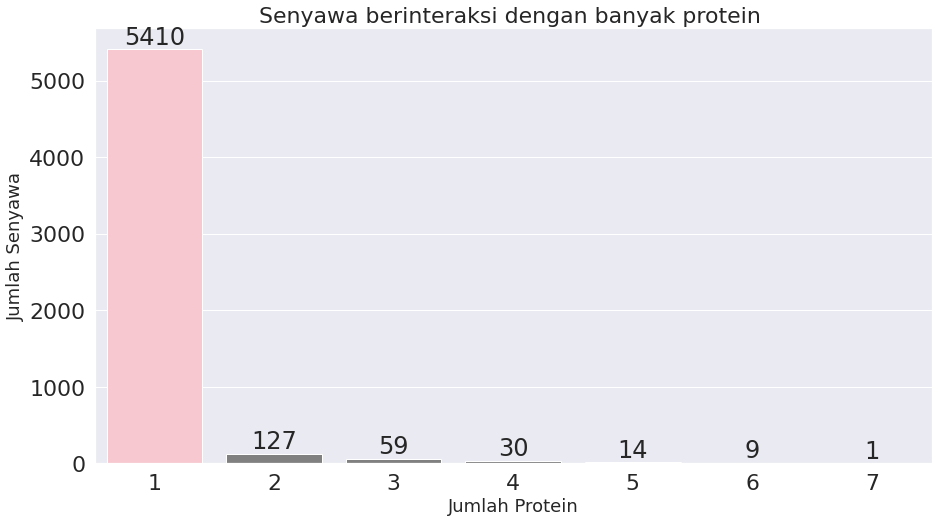

In [25]:
rowSums = df_vis.iloc[:,1:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[0:]

values = multiLabel_counts   
idx = categories
clrs = ['grey' if (x < max(values)) else 'pink' for x in values ]
# sb.barplot(x=idx, y=values, palette=clrs) # color=clrs)

sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values, palette=clrs)

plt.title("Senyawa berinteraksi dengan banyak protein ", fontsize=22)
plt.ylabel('Jumlah Senyawa', fontsize=18)
plt.xlabel('Jumlah Protein', fontsize=18)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

# Visualisasi Metric

In [28]:
# sae_dnn = {
#     'acc' : 0.88408,
#     'f1': 0.90447,
#     'prec': 0.91494,
#     'rec': 0.90390
# }

# dnn = {
#     'acc' : 0.88376,
#     'f1': 0.90395,
#     'prec': 0.91454,
#     'rec': 0.90254
# }

NameError: name 'sae_dnn' is not defined

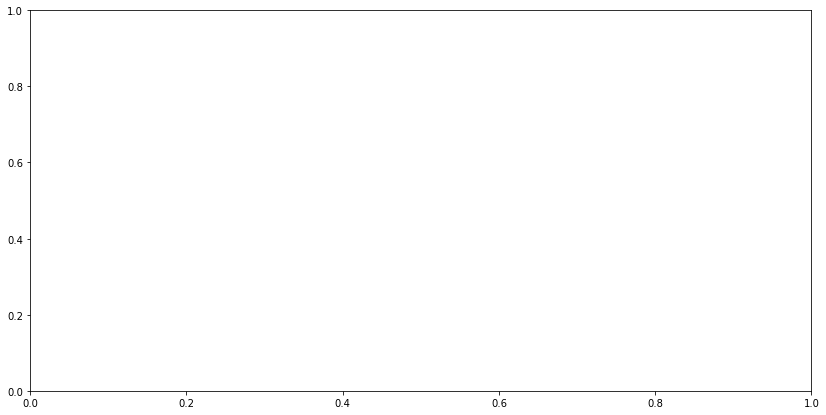

In [41]:
# Intitialize figure with two plots
fig, ax1, = plt.subplots(1)
# fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

## set bar size
barWidth = 0.2
sae_dnn_score = [sae_dnn['acc'], sae_dnn['f1'], sae_dnn['prec'], sae_dnn['rec']]
dnn_score = [dnn['acc'], dnn['f1'], dnn['prec'], dnn['rec']]

## Set position of bar on X axis
r1 = np.arange(len(sae_dnn_score))
r2 = [x + barWidth for x in r1]

## Make the plotRandom Forest
ax1.bar(r1, sae_dnn_score, width=barWidth, edgecolor='white', label='SAE-DNN', align='center')
ax1.bar(r2, dnn_score, width=barWidth, edgecolor='white', label='DNN', align='center')


## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'F1', 'Precision', 'Recall']
ax1.set_xticks([r + (barWidth * 1) for r in range(len(sae_dnn_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=22, fontweight='bold')
ax1.legend()

plt.show()

In [19]:
# pubchem
# SAE-DNN TUNED PERFORMANCE
# Accuracy    : 0.81614±0.036
# F1 Score    : 0.84447±0.036
# Precision   : 0.84918±0.037
# Recall      : 0.85562±0.036
pubchem_saednn = [0.81614, 0.84447, 0.84918, 0.85562]

In [20]:
# pubchem
# DNN ONLY PERFORMANCE
# Accuracy    : 0.78103±0.058
# F1 Score    : 0.83206±0.031
# Precision   : 0.82968±0.038
# Recall       : 0.85382±0.034
pubchem_dnn = [0.78103, 0.83206, 0.82968, 0.85382]

In [9]:
# klekota
# SAE-DNN TUNED PERFORMANCE
# Accuracy    : 0.77854±0.040
# F1 Score    : 0.81754±0.048
# Precision   : 0.81660±0.050
# Recall      : 0.84416±0.051
klekota_saednn = [0.77854, 0.81754, 0.81660, 0.84416]

In [10]:
# klekota
# DNN ONLY PERFORMANCE
# Accuracy    : 0.76815±0.006
# F1 Score    : 0.82152±0.027
# Precision   : 0.81762±0.022
# Recall       : 0.85795±0.039
klekota_dnn = [0.76815, 0.82152, 0.81762, 0.85795]

In [11]:
# maccs
# SAE-DNN TUNED PERFORMANCE
# Accuracy    : 0.79630±0.038
# F1 Score    : 0.85032±0.026
# Precision   : 0.84933±0.029
# Recall      : 0.86784±0.031
maccs_saednn = [0.79630, 0.85032, 0.84933, 0.86784]

In [12]:
# DNN ONLY PERFORMANCE
# Accuracy    : 0.83628±0.017
# F1 Score    : 0.85876±0.012
# Precision   : 0.86895±0.016
# Recall       : 0.85852±0.012
maccs_dnn = [0.83628, 0.85876, 0.86895, 0.85852]

In [ ]:
Pubchem 

In [17]:
def visual(sad_dnn, dnn, judul):
    # Intitialize figure with two plots
    fig, ax1, = plt.subplots(1)
    # fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
    fig.set_figheight(7)
    fig.set_figwidth(7)
    fig.set_facecolor('white')

    ## set bar size
    barWidth = 0.3
    sae_dnn_score = sad_dnn
    dnn_score = dnn

    ## Set position of bar on X axis
    r1 = np.arange(len(sae_dnn_score))
    r2 = [x + barWidth for x in r1]

    ## Make the plotRandom Forest
    ax1.bar(r1, sae_dnn_score, width=barWidth, edgecolor='white', label='SAE-DNN', align='edge')
    ax1.bar(r2, dnn_score, width=barWidth, edgecolor='white', label='DNN', align='edge')


    ## Configure x and y axis
#     ax1.set_xlabel('Metrics', fontweight='bold')
    labels = ['Accuracy', 'F1', 'Precision', 'Recall']
    ax1.set_xticks([r + (barWidth * 1) for r in range(len(sae_dnn_score))], )
    ax1.set_xticklabels(labels)
#     ax1.set_ylabel('Score', fontweight='bold')
    ax1.set_ylim(0, 1)

    ## Create legend & title
    ax1.set_title(judul, fontsize=22, fontweight=None)
    ax1.legend()

    plt.show()
    



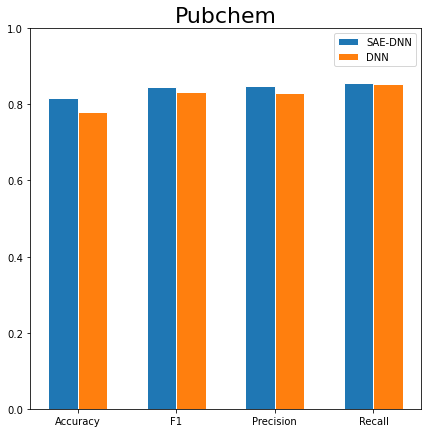

In [45]:
visual(pubchem_saednn, pubchem_dnn, 'Pubchem')

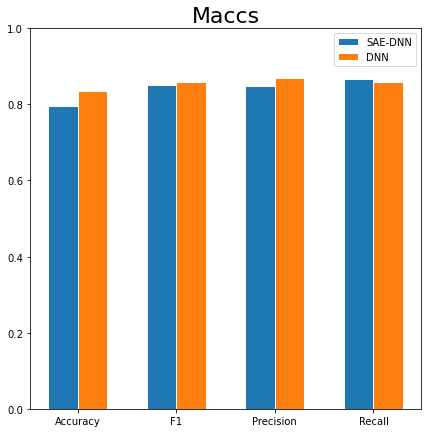

In [46]:
visual(maccs_saednn, maccs_dnn, 'Maccs')

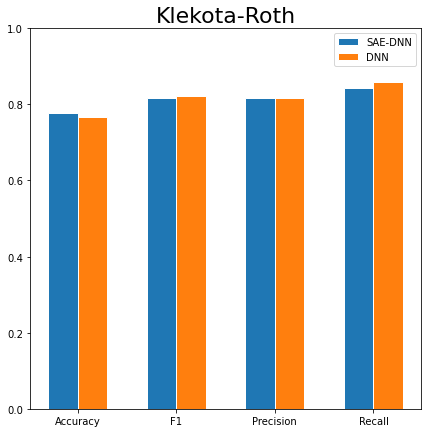

In [47]:
visual(klekota_saednn, klekota_dnn, 'Klekota-Roth')

In [ ]:
SAE-DNN TUNED PERFORMANCE
Accuracy    : 0.77904±0.030
F1 Score    : 0.82595±0.022
Precision   : 0.82601±0.026
Recall      : 0.85364±0.026

In [ ]:
DNN ONLY PERFORMANCE
Accuracy    : 0.77326±0.026
F1 Score    : 0.81918±0.017
Precision   : 0.81775±0.020
Recall       : 0.84729±0.009

In [1]:

klekota_saednn = [0.77904, 0.82595, 0.82601, 0.85364]

In [2]:

klekota_dnn = [0.77326, 0.81918, 0.81775, 0.84729]

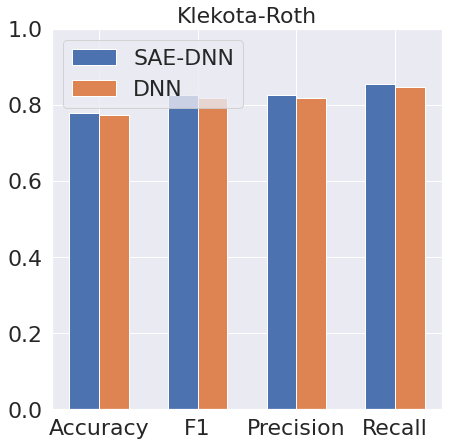

In [18]:
visual(klekota_saednn, klekota_dnn, 'Klekota-Roth')

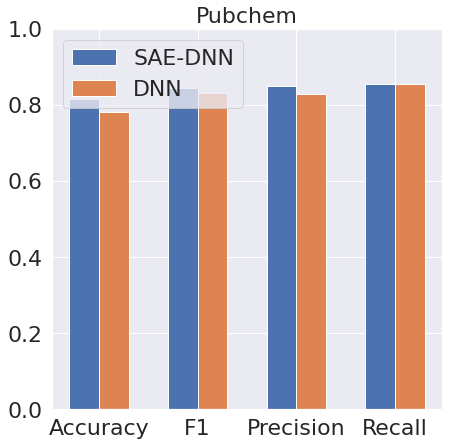

In [21]:
visual(pubchem_saednn, pubchem_dnn, 'Pubchem')